In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk(r'C:\Users\hp\Desktop\Potato'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG
C:\Users\hp\Desktop\Potato\Test\Potato___Early_blight\109730cd-03f3-4139-a464-5f9151483e8c___RS_

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

import os
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Your code for data loading and preprocessing


In [5]:
SIZE= 256
SEED_TRAINING=121
SEED_TESTING=197
SEED_VALIDATION=164
CHANNELS=3
n_classes=3
EPOCHS=20
BATCH_SIZE=16
input_shape=(SIZE, SIZE, CHANNELS)

In [6]:
train_datagen= ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [7]:
validation_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        directory= r'C:\Users\hp\Desktop\Potato\Train',
        target_size= (255,256), # all images will be resized to 64*64
        batch_size= BATCH_SIZE,
        class_mode= 'categorical',
        color_mode="rgb")

Found 900 images belonging to 3 classes.


In [10]:
validation_generator= validation_datagen.flow_from_directory(
            directory= r'C:\Users\hp\Desktop\Potato\Valid',
            target_size= (256,256),
            batch_size= BATCH_SIZE,
            class_mode= 'categorical',
            color_mode="rgb")

Found 300 images belonging to 3 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
        directory =r'C:\Users\hp\Desktop\Potato\Test',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb")

Found 300 images belonging to 3 classes.


In [14]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,667 (725.26 KB)

 Trainable params: 185,667 (725.26 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/20


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 795ms/step - accuracy: 0.3480 - loss: 1.0981 - val_accuracy: 0.6007 - val_loss: 0.9501
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 0.7415 - val_accuracy: 0.5000 - val_loss: 1.2569
Epoch 3/20


C:\Users\hp\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 757ms/step - accuracy: 0.5564 - loss: 0.8729 - val_accuracy: 0.8715 - val_loss: 0.4495
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0953 - val_accuracy: 0.7500 - val_loss: 0.4411
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 759ms/step - accuracy: 0.8308 - loss: 0.4072 - val_accuracy: 0.8403 - val_loss: 0.3283
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3205 - val_accuracy: 0.9167 - val_loss: 0.3003
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 776ms/step - accuracy: 0.8816 - loss: 0.3178 - val_accuracy: 0.8924 - val_loss: 0.3317
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.2992 - val_accuracy: 0.8333 - val_loss: 0.3286
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 779ms/step - accuracy: 0.8844 - loss: 0.2657 - val_accuracy: 0.7986 - val_loss: 0.4778
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.3531 - val_accuracy: 0.6667 - val_los

In [19]:
score= model.evaluate(test_generator)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9051 - loss: 0.2995
Test loss: 0.26673486828804016
Test accuracy: 0.8966666460037231


In [20]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss= history.history['val_loss']

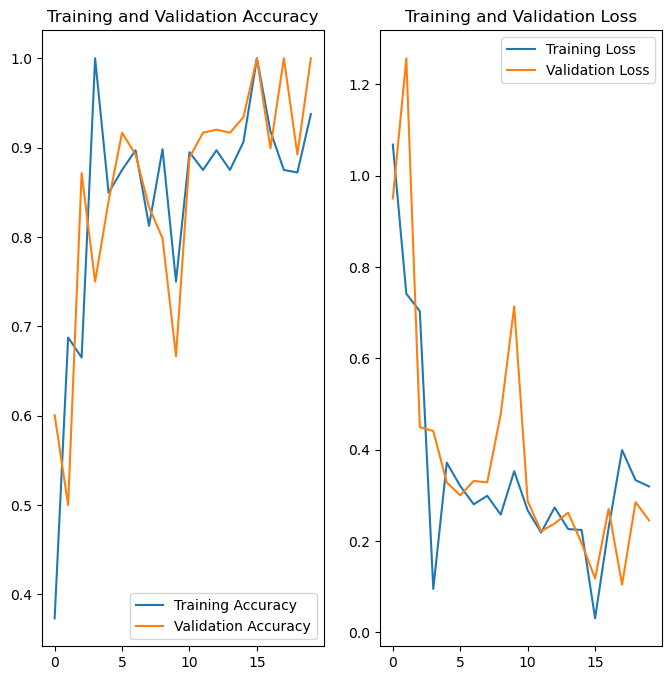

In [21]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [23]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model.save('my_model.keras')

In [26]:
def prediction(img):
    class_names = ['Early_blight', 'Healthy', 'Late_blight']

    # Load the image and convert it to RGB if it's grayscale
    my_image = image.load_img(img, target_size=(256, 256))
    my_image = image.img_to_array(my_image)
    if my_image.shape[-1] == 1:  # If the image has only one channel (grayscale)
        my_image = np.concatenate([my_image] * 3, axis=-1)  # Convert to RGB

    my_image = np.expand_dims(my_image, 0)

    out = np.round(model.predict(my_image)[0], 2)
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray', edgecolor='red', linewidth=1, height=0.5)

    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')
    plt.xticks([])
    plt.yticks([0, 1, 2], labels=class_names, fontweight='bold', fontsize=14)
    fig.savefig('pred_img.png', bbox_inches='tight')
    return plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


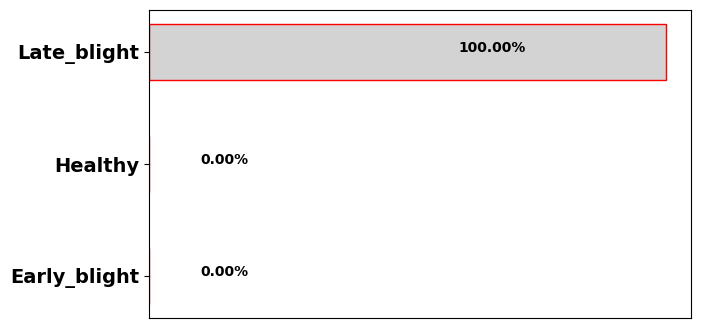

In [27]:
img=r'C:\Users\hp\Desktop/Potato/Test/Potato___healthy/Potato_healthy-26-_0_4635.jpg'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


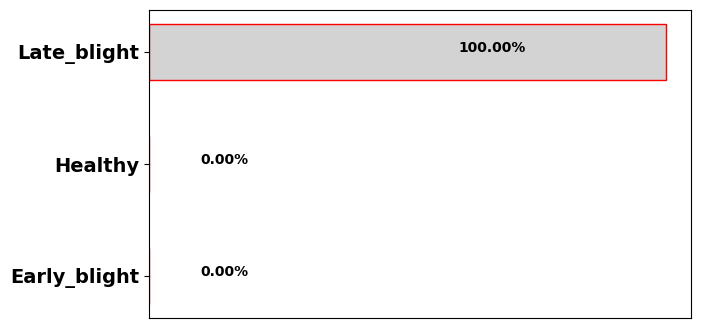

In [28]:
img=r'C:\Users\hp\Desktop/Potato/Test/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


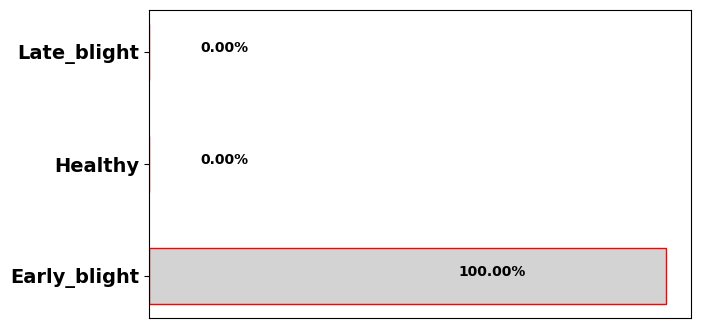

In [30]:
img=r'C:\Users\hp\Desktop/Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG'
prediction(img)